In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [192]:
# 定义全局变量
miu = 0.01
g = 9.8
m_ren=70
m_che=7
m = m_ren + m_che
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
rou = 1.205   # kg/m^3

sigma1 = 42 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出

W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

In [193]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*rou*s*v*v

def f_zu(v):
    return f1 + f2(v)

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

# P功率最大维持时间
def T(P):
    return W_max / ( (2.38969595e-06*(P-sigma1)**3+3.2) *P)

# 添加k的时间
def T_new(P,k):
    return W_max / ( (2.38969595e-06*( (P-sigma1)/(1-k) )**3+3.2) *( (P-sigma1)/(1-k)+sigma1) )

# 要休息的时间
def T_rest(P):
    return (P-139) /97 * T(P)


In [194]:
k_test = np.linspace(0,0.9,10)
p_test = np.linspace(43,700,100)

yy=[]
color=["#ff0000","#ff8c00","#ffd700","#f0e680","#adff2f","#00ffff","#40e0d0","#00bfff","#1e90ff","#0000ff","#191970"]
for i in range(len(k_test)):
    t_new = T_new(p_test,k_test[i])
    yy.append(t_new)

# 要休息的时间
tr=T_rest(p_test)       

In [195]:
# 初始化挡位
dangwei=[2, 2, 2, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

p_dw=[]
pp_temp=np.asarray([42,100,200,300,400,500,600,700])

p_dw_time = [17883, 600, 951, 181, 53, 20, 9, 5] 
p_dw_tr = [0, 1, 598, 300, 120, 70, 18, 10] 
p_dw_t_all = np.asarray(p_dw_time)  + np.asarray(p_dw_tr)
# # 每个挡位能坚持的时间
# p_dw_time=[]
# for i in range(len(pp_temp)):
#     p_dw_time.append(math.floor(T(pp_temp[i])))
# # 每个挡位需要休息的时间
# p_dw_tr = [math.floor(T_rest(i)) for i in pp_temp]
# p_dw_tr[0]=0
# p_dw_tr[1]=0

# # print(p_dw_tr)

# # 每个挡位需要的总时间
# p_dw_t_all = np.asarray(p_dw_time) + np.asarray(p_dw_tr)
# print(p_dw_time,p_dw_tr,p_dw_t_all)


# p_dw矩阵初始化
for i in range(10):
    k = 0.1 * i
    p_dw.append( np.round((pp_temp-42)*(1-k) + 42,0) )
print(p_dw)

# v_dw=[
#     [5.7,9.1,12.5,]

# ]

[array([ 42., 100., 200., 300., 400., 500., 600., 700.]), array([ 42.,  94., 184., 274., 364., 454., 544., 634.]), array([ 42.,  88., 168., 248., 328., 408., 488., 568.]), array([ 42.,  83., 153., 223., 293., 363., 433., 503.]), array([ 42.,  77., 137., 197., 257., 317., 377., 437.]), array([ 42.,  71., 121., 171., 221., 271., 321., 371.]), array([ 42.,  65., 105., 145., 185., 225., 265., 305.]), array([ 42.,  59.,  89., 119., 149., 179., 209., 239.]), array([ 42.,  54.,  74.,  94., 114., 134., 154., 174.]), array([ 42.,  48.,  58.,  68.,  78.,  88.,  98., 108.])]


In [204]:

times = 10000   # 尝试变换次数
t_all = [] # 记录每次中的到达终点需要的t
t_best = 30000

dw_best = dangwei.copy() #记录目前效果最好的dangwei数组
tem_alpha = 0.99
tem = 0.00000001       # 初始温度

# 转弯矩阵
turn = [[1000,2000],[5000,7000]]
v_limit = 1
# 坡度矩阵
slope = [0,	2.7, 4.9, 10.3, 15.5, 17.5, 22.1, 24.8, 27, 32.4, 37.6, 39.6, 44.2]
slope_angle = [-0.036296296, -0.017272727, 0.040925926,	-0.033846154, 0.045, 0.000217391,
	-0.036296296,  -0.017272727,   0.040925926,  -0.033846154,  0.045,  0.000217391]



best_t=[]    # 时间
best_v=[]    # 速度
best_p=[]    # 功率
best_x=[]    # 路程
best_f=[]    # 阻力
best_k=[]    # 记录取整的k
best_E=[]    # 消耗的能量

for iii in range(times): # 尝试搜times次
    tem *= tem_alpha
    dangwei = dw_best.copy()   # 确认现在的挡位选择为当前最优
    #  确定dangwei_len
    dangwei_len=0
    time_all=0
    for jjj in range(1000):
        # print(jjj,time_all)
        time_all += p_dw_t_all[dangwei[jjj]]
        if time_all >= 20000:
            dangwei_len = jjj+1
            break


    # 随机出一个dangwei数组，长度500
    rrr = random.randint(1,dangwei_len-1)   # dangwei数组位置
    while True:
        rrrr = random.randint(1,7)              # 第rrr个位置换成 随机1-7之间的rrrr
        if dangwei[rrr]==rrrr:
            continue
        else:
            dangwei[rrr] = rrrr
            break


    # if rrr%2:   # rrr应该小于前一个，不等于后一个
    #     choice= [i for i in range(1,dangwei[rrr-1])]
    #     if dangwei[rrr+1] in choice:
    #         choice.remove(dangwei[rrr+1])
    #     length = len(choice)
    #     if length==0:
    #         continue
    #     else:
    #         rrrr = random.randint(0,length-1)
    #         dangwei[rrr] = choice[rrrr]
    # else:       # rrr应该大于后一个，不等于前一个
    #     choice = [i for i in range(dangwei[rrr+1]+1,8)]
    #     if dangwei[rrr-1] in choice:
    #         choice.remove(dangwei[rrr-1])
    #     length = len(choice)
    #     if length==0:
    #         continue
    #     else:
    #         rrrr = random.randint(0,length-1)
    #         dangwei[rrr] = choice[rrrr]


    # 初始化  目前不需要休息时间
    flag=1      #  判断结束后退出的标志
    j = 0  # 标志挡位改变的标记

    t=[]    # 时间
    v=[]    # 速度
    p=[]    # 功率
    x=[]    # 路程
    f=[]    # 阻力
    k=[]    # 记录取整的k
    E=[]    # 消耗的能量
    kk=[]   # 记录未取整的k
    sigma=[]

    # 添加初始值
    kk.append(0)
    t.append(0)
    v.append(0)
    k.append(0)
    p_new = p_dw[int(k[0]/0.1)][dangwei[j]]
    p.append(p_new)
    x.append(0)
    f.append(f1)

    E.append(0)

    sigma.append(sigma2(p[0]))

   
    stay = p_dw_time[dangwei[j]]  # 该挡位可持续时间
    stay2= p_dw_t_all[dangwei[j]] # 加上所需42W休息时间
    # 开始迭代
    for i in range(1,100000):
        t_temp = t[i-1]+1;  t.append(t_temp)
        # 确定此时的P
        if i<=stay:
            p_temp = p_dw[int(k[i-1]/0.1)][dangwei[j]]
            # k_temp = (k[i-1]); k.append(k_temp//0.1 /10); 
            # kk.append(k_temp)
        elif i >stay and i < stay2:
            p_temp = sigma1
        elif i==stay2:
            p_temp = p_dw[int(k[i-1]/0.1)][dangwei[j+1]]
            p_new = p_dw[int(k[i-1]/0.1)][dangwei[j+1]]
            j+=1  # 下次取下一个挡位
            stay = stay2 + p_dw_time[dangwei[j]]
            stay2 = stay2 + p_dw_t_all[dangwei[j]]


        k_temp = (E[i-1] / 2e6); 
        if k_temp < 0.991:
            k.append(k_temp//0.1 /10); 
        else:
            k.append(0.99)

            # kk.append(k_temp)

        p.append(p_temp)

        v_temp = math.sqrt( 2*(p[i-1]-f[i-1]*v[i-1])/m + v[i-1]**2 )
        x_temp = x[i-1] + (v[i-1] + v_temp)/2 
        if len(turn)>0:
            if x_temp>=turn[0][1]:
                del turn[0]
            elif x_temp >= turn[0][0] and x_temp <turn[0][1]:
                v_temp = v_limit
                x_temp = x_temp = x[i-1] + (v[i-1] + v_temp)/2

        v.append(v_temp)
        x.append(x_temp)
        f_temp = f_zu(v[i]) + 5;    f.append(f_temp)
        E_temp = E[i-1] + p[i-1] - sigma1;  E.append(E_temp)



        # print('时刻i: ', i, ' stay=',stay, ' t=',t[i],' p=',p[i],' v=',v[i],' x=',x[i],' f=',f[i],' E=',E[i],' k=',k[i])
        # print('时刻i: ', i, ' stay=',stay, ' dw=',dangwei[j],' p=',p[i],' x=',x[i],' k=',k[i])

        if(x_temp>140000 and flag):
            t_all.append(i)
            # print(i/3600) # 打印小时数
            if i < t_best:
                t_best = i
                dw_best = dangwei.copy()
                best_t=t.copy()    # 时间     
                best_v=v.copy()    # 速度     
                best_p=p.copy()    # 功率     
                best_x=x.copy()    # 路程     
                best_f=f.copy()    # 阻力     
                best_k=k.copy()    # 记录取整的k   
                best_E=E.copy()    # 消耗的能量       
            break
            # else:   # 模拟退火
            #     p_simulated=math.exp(-abs(i-t_best)/tem)
            #     # print(abs(fsig_temp-fsig_last),p_simulated)
            #     if random.random()<p_simulated:
            #         t_best = i
            #         dw_best = dangwei.copy()
    
        # print('时刻i: ', ' t=',t[i],' ae=',stay,' re=',stay2,' p=',p[i],' j=',j,' x=',x[i],' k=',k[i])
    if iii%100==0:
        print("第",iii,"次，  交换第",rrr,"个，  目前到达终点时间",t_all[iii]/3600,"，  最优时间",t_best/3600)

第 0 次，  交换第 641 个，  目前到达终点时间 5.550277777777778 ，  最优时间 5.550277777777778
第 100 次，  交换第 312 个，  目前到达终点时间 4.446666666666666 ，  最优时间 4.4463888888888885
第 200 次，  交换第 273 个，  目前到达终点时间 4.442222222222222 ，  最优时间 4.441666666666666
第 300 次，  交换第 332 个，  目前到达终点时间 4.437777777777778 ，  最优时间 4.4375
第 400 次，  交换第 717 个，  目前到达终点时间 4.4375 ，  最优时间 4.4375
第 500 次，  交换第 526 个，  目前到达终点时间 4.475833333333333 ，  最优时间 4.4375
第 600 次，  交换第 255 个，  目前到达终点时间 4.437777777777778 ，  最优时间 4.4375
第 700 次，  交换第 318 个，  目前到达终点时间 4.437777777777778 ，  最优时间 4.4375
第 800 次，  交换第 576 个，  目前到达终点时间 4.451666666666667 ，  最优时间 4.4375
第 900 次，  交换第 155 个，  目前到达终点时间 4.438055555555556 ，  最优时间 4.4375
第 1000 次，  交换第 483 个，  目前到达终点时间 4.475833333333333 ，  最优时间 4.4375
第 1100 次，  交换第 114 个，  目前到达终点时间 4.4425 ，  最优时间 4.4375
第 1200 次，  交换第 715 个，  目前到达终点时间 4.4375 ，  最优时间 4.4375
第 1300 次，  交换第 379 个，  目前到达终点时间 4.4880555555555555 ，  最优时间 4.4375
第 1400 次，  交换第 280 个，  目前到达终点时间 4.437777777777778 ，  最优时间 4.4375
第 1500 次，  交换第 607 个，  目前到达终点时间 4.4

In [205]:
# p_dw[int(k[0]/0.1)][dangwei[j]]
print(len(t_all),t_best,dw_best)

10000 15975 [2, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 7, 7, 7, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 6, 5, 6, 5, 7, 7, 6, 5, 6, 6, 7, 5, 7, 5, 6, 7, 5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 7, 5, 7, 7, 7, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 7, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 

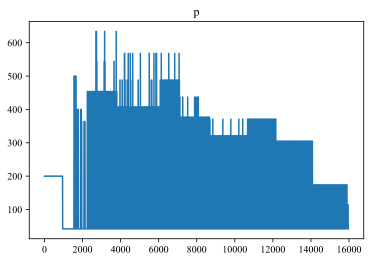

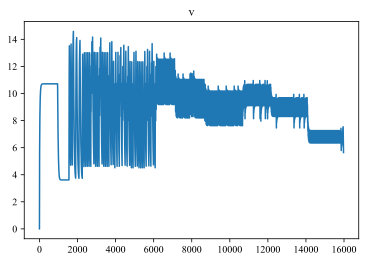

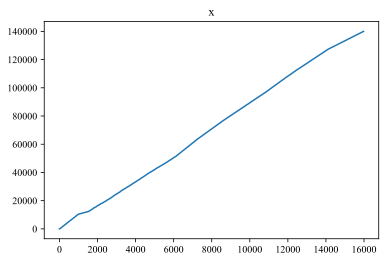

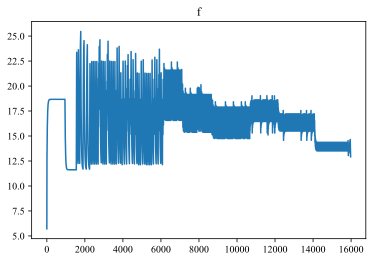

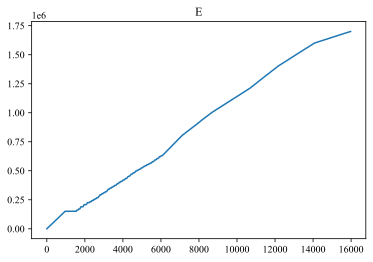

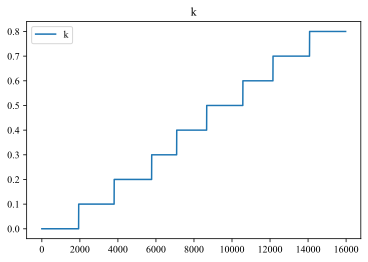

In [206]:
# 绘图
plt.plot(best_t,best_p)
plt.title("p")
plt.show()

plt.plot(best_t,best_v)
plt.title("v")
plt.show()

plt.plot(best_t,best_x)
plt.title("x")
plt.show()

plt.plot(best_t,best_f)
plt.title("f")
plt.show()

plt.plot(best_t,best_E)
plt.title("E")
plt.show()

plt.plot(best_t,best_k,label='k')
# plt.plot(t,kk,label="k'")

plt.title("k")
plt.legend()
plt.show()
